In [38]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [39]:
lfw = datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)


In [40]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [41]:
lfw.data.shape

(1140, 1850)

In [42]:
lfw.images.shape
lfw.data[0]
lfw.images


array([[[0.33464053, 0.3267974 , 0.18039216, ..., 0.41568628,
         0.40522876, 0.3620915 ],
        [0.37254903, 0.303268  , 0.21437909, ..., 0.32156864,
         0.42222223, 0.3764706 ],
        [0.37777779, 0.2640523 , 0.38431373, ..., 0.25882354,
         0.31764707, 0.35947713],
        ...,
        [0.11111111, 0.1267974 , 0.16732027, ..., 0.43006536,
         0.4       , 0.39869285],
        [0.07973856, 0.09934641, 0.13333334, ..., 0.41045752,
         0.38823533, 0.48366013],
        [0.1124183 , 0.12026144, 0.14640523, ..., 0.43137255,
         0.4509804 , 0.7529412 ]],

       [[0.19215687, 0.2130719 , 0.33333334, ..., 0.44183007,
         0.23398693, 0.14379086],
        [0.1503268 , 0.20784314, 0.3869281 , ..., 0.5738562 ,
         0.41699347, 0.22352941],
        [0.151634  , 0.24705882, 0.45620915, ..., 0.59477127,
         0.54901963, 0.32026145],
        ...,
        [0.55947715, 0.42745098, 0.20130719, ..., 0.87973857,
         0.88366014, 0.8535948 ],
        [0.5

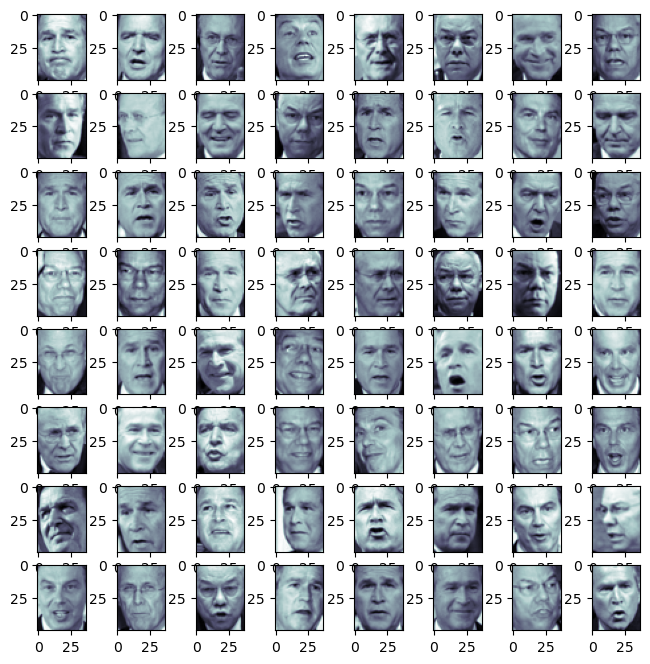

In [43]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(lfw.images[i],cmap=plt.cm.bone)
    
plt.show()


In [44]:
x,y = lfw.data,lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y)
pca = PCA()
pca.fit(x_train)

PCA()

In [45]:
k=0
curr_variance = 0
total = sum(pca.explained_variance_)
while curr_variance/total<0.95:
    curr_variance+= pca.explained_variance_[k]
    k+=1
    
k

150

In [46]:
pca_lfw = PCA(n_components=k,whiten=True)
transformed = pca_lfw.fit_transform(x_train)
transformed.shape

(855, 150)

In [47]:
x_approx = pca_lfw.inverse_transform(transformed)
x_approx = x_approx.reshape(855,50,37)

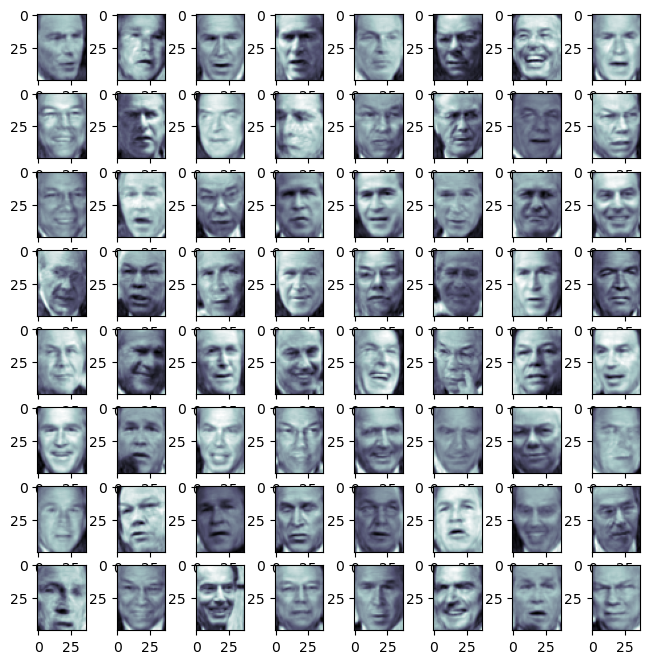

In [48]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i],cmap=plt.cm.bone)
    
plt.show()

In [49]:
x_train_pca = transformed
x_test_pca = pca_lfw.transform(x_test)

# Without PCA : RandomForest Prediction

In [50]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

2.2307703495025635
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        53
           1       1.00      0.24      0.39        29
           2       0.68      0.95      0.80       146
           3       0.40      0.09      0.15        22
           4       0.80      0.34      0.48        35

    accuracy                           0.69       285
   macro avg       0.72      0.47      0.50       285
weighted avg       0.71      0.69      0.65       285

[[ 38   0  14   1   0]
 [  4   7  18   0   0]
 [  5   0 139   2   0]
 [  2   0  15   2   3]
 [  6   0  17   0  12]]


# With PCA : Random Forest Prediction

In [51]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
print(time.time()-start)
y_pred=rf.predict(x_test_pca)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8121731281280518
              precision    recall  f1-score   support

           0       0.79      0.57      0.66        53
           1       1.00      0.07      0.13        29
           2       0.58      0.96      0.73       146
           3       0.00      0.00      0.00        22
           4       0.75      0.09      0.15        35

    accuracy                           0.61       285
   macro avg       0.62      0.34      0.33       285
weighted avg       0.64      0.61      0.53       285

[[ 30   0  23   0   0]
 [  1   2  26   0   0]
 [  4   0 140   1   1]
 [  1   0  21   0   0]
 [  2   0  30   0   3]]
